# Reconstruction of 3D Shepp Logan phantom.

This file demonstrates the generation of a 3D Shepp-Logan phantom followed by sinogram projection and reconstruction using MBIR. 
The phantom, sinogram, and reconstruction are then displayed. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import svmbir

In [2]:
def plot_image(img, title=None, vmin=None, vmax=None):
    """
    Function to display and save a 2D array as an image.
    :param img: 2D numpy array to display
    :param title: Title to display
    :param vmin: Value mapped to black
    :param vmax: Value mapped to white
    """

    fig = plt.figure()
    imgplot = plt.imshow(img, vmin=vmin, vmax=vmax)
    plt.title(label=title)
    imgplot.set_cmap('gray')
    plt.colorbar()
    plt.show()
    plt.close()

##  Parameters

In [3]:
# Simulated image parameters
num_rows = 256
num_cols = num_rows
center_slice = 16
num_slices = 2*center_slice

# Simulated sinogram parameters
num_views = 144

# Reconstruction parameters
T = 0.1
p = 1.1
sharpness = 4.0
snr_db = 40.0

# Generate array of view angles form -180 to 180 degs
angles = np.linspace(-np.pi/2.0, np.pi/2.0, num_views, endpoint=False)

## Generate phantom with multiple slices

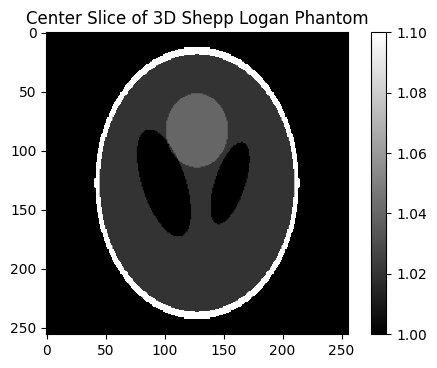

In [4]:
phantom = svmbir.phantom.gen_shepp_logan_3d(num_rows,num_cols,num_slices)
mpl.rcParams['figure.dpi'] = 100
plot_image(phantom[center_slice-3], title='Center Slice of 3D Shepp Logan Phantom',vmin=1., vmax=1.1)

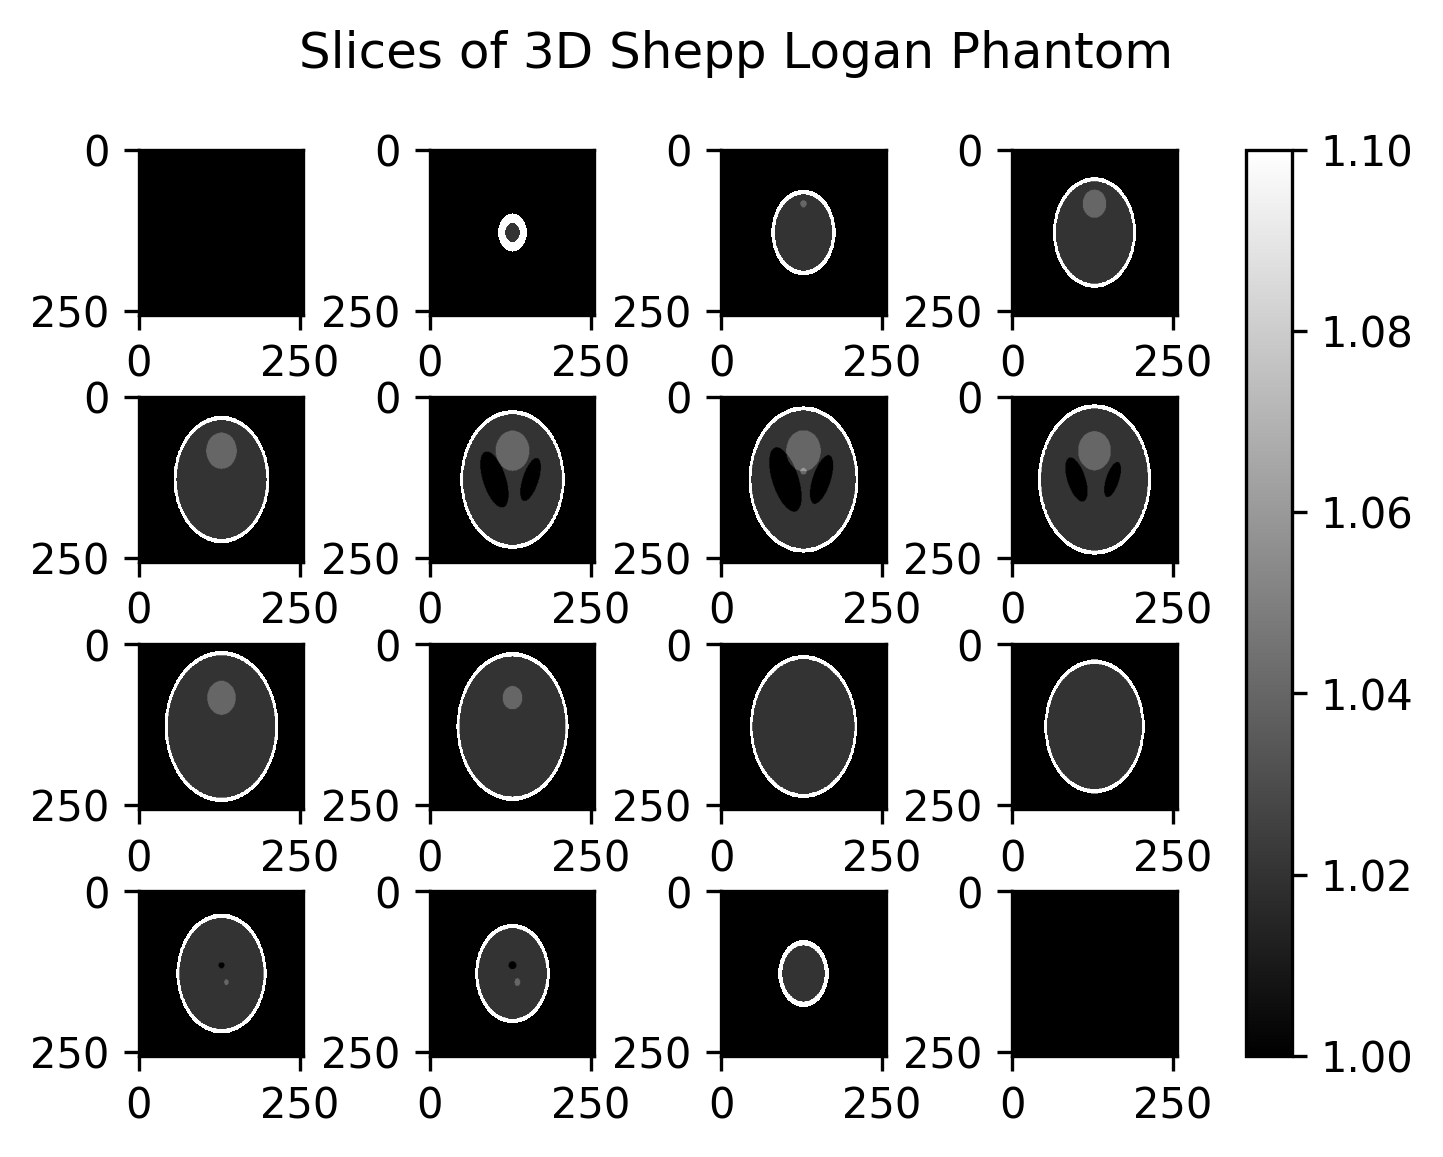

In [5]:
mpl.rcParams['figure.dpi'] = 300

fig, axs = plt.subplots(4, 4)
plt.set_cmap('gray')
plt.subplots_adjust(hspace=0.5)
for i in range(0,16):
    im=axs[i//4, i%4].imshow(phantom[i*2,:, :], vmin=1.0, vmax=1.1)

fig.colorbar(im,ax=axs)
fig.suptitle('Slices of 3D Shepp Logan Phantom')
plt.show()
plt.close()

## Generate sinogram by projecting 3D phantom

Found system matrix: /Users/damonli/.cache/svmbir/parbeam/sysmatrix/abd33f36e770cb3ed8e9.2Dsvmatrix


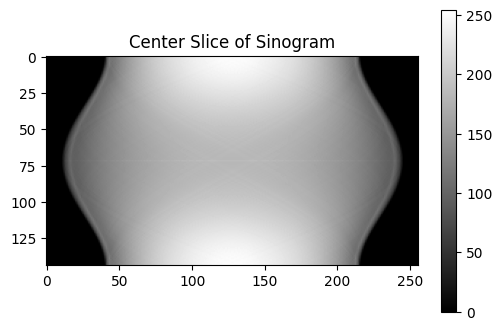

In [6]:
mpl.rcParams['figure.dpi'] = 100
sino = svmbir.project(angles, phantom, max(num_rows, num_cols))
plot_image(sino[:,center_slice-2,:], title='Center Slice of Sinogram')

## MBIR reconstruction

Found system matrix: /Users/damonli/.cache/svmbir/parbeam/sysmatrix/abd33f36e770cb3ed8e9.2Dsvmatrix


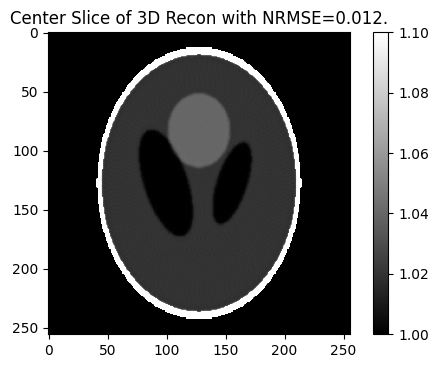

In [7]:
# Determine resulting number of views, slices, and channels
(num_views, num_slices, num_channels) = sino.shape

# Perform MBIR reconstruction
recon = svmbir.recon(sino, angles, num_rows=num_rows, num_cols=num_cols, T=T, p=p, sharpness=sharpness, snr_db=snr_db)

# Compute Normalized Root Mean Squared Error
nrmse = svmbir.phantom.nrmse(recon, phantom)

# display reconstruction
mpl.rcParams['figure.dpi'] = 100
title = f'Center Slice of 3D Recon with NRMSE={nrmse:.3f}.'
plot_image(recon[center_slice-3], title=title, vmin=1.0, vmax=1.1)

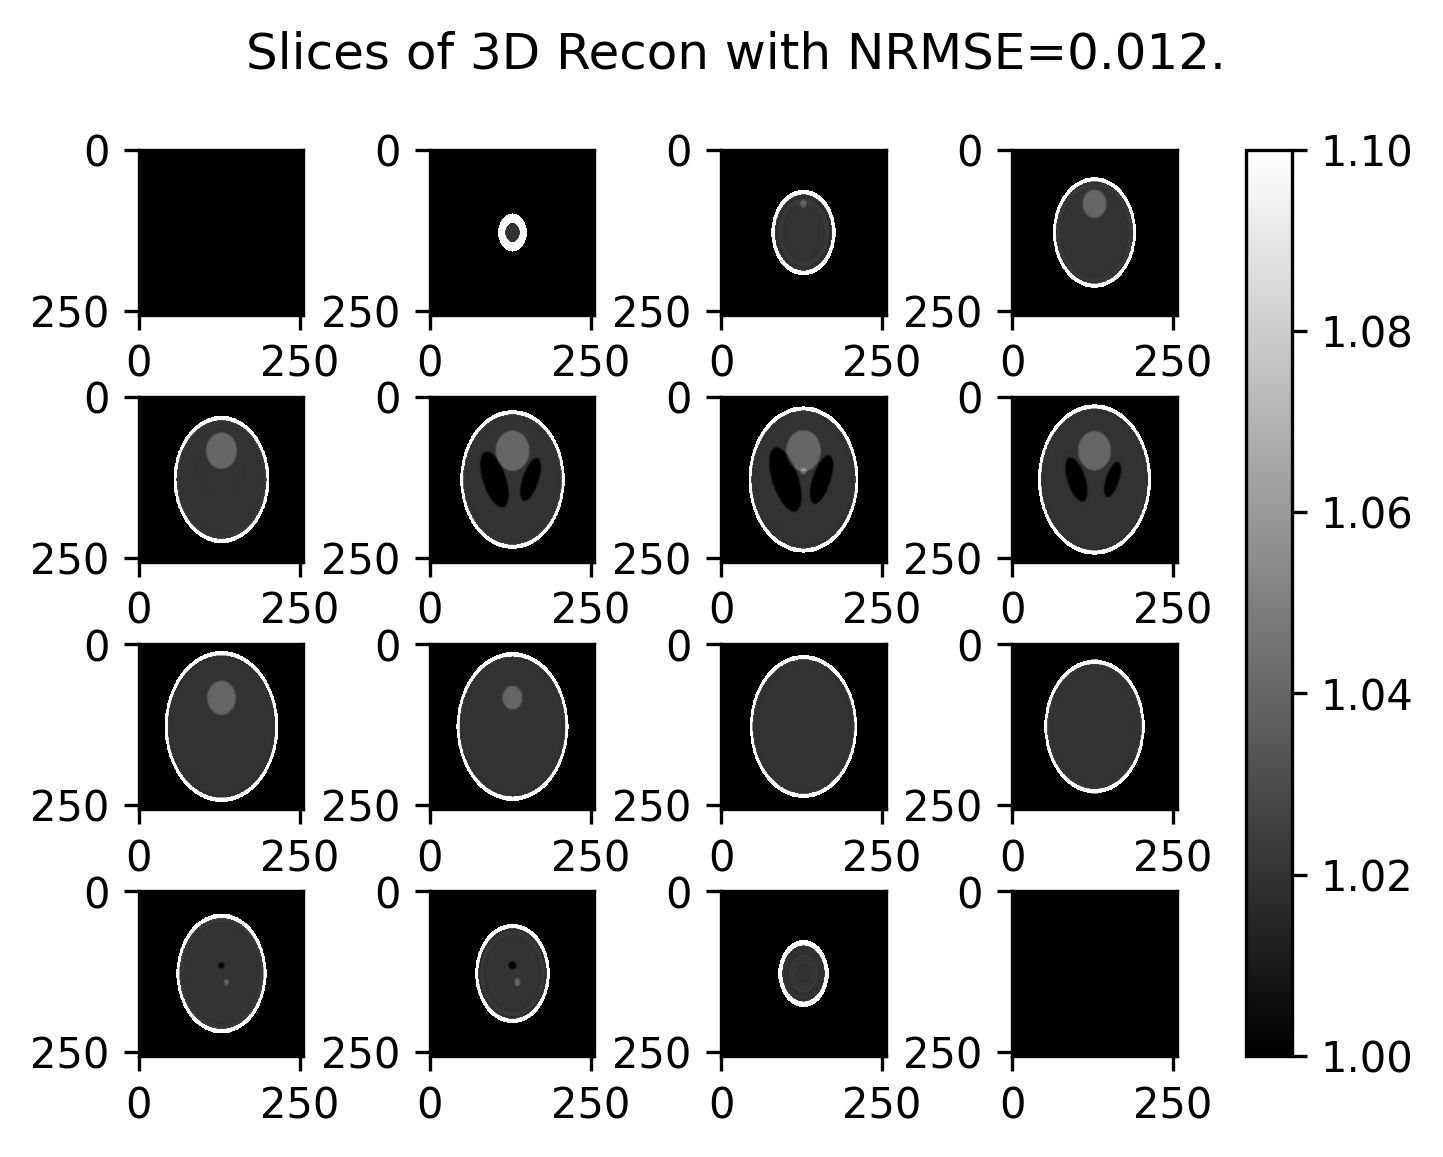

In [8]:
mpl.rcParams['figure.dpi'] = 300

fig, axs = plt.subplots(4, 4)
plt.set_cmap('gray')
plt.subplots_adjust(hspace=0.5)
for i in range(0,16):
    im=axs[i//4, i%4].imshow(recon[i*2,:, :], vmin=1.0, vmax=1.1)

fig.colorbar(im,ax=axs)
title = f'Slices of 3D Recon with NRMSE={nrmse:.3f}.'
fig.suptitle(title)
plt.show()
plt.close()